## Load Packages and Data

In [12]:
import pandas as pd
df = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])

# First Look

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

## Summary Statistic and missing values

In [14]:
df.describe()
null_counts = df.isna().sum().sort_values(ascending=False)
if_null = null_counts[null_counts > 0]
pct_null = null_counts / len(df)
pct_null[pct_null > 0.05]

Comments    1.0
dtype: float64

## Outlier Detection and Cleaning

In [15]:
from scipy.stats import zscore
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = df[cols].apply(zscore)
outliers = (z.abs() > 3).any(axis=1)
df_out = df[~outliers]
df[cols] = df[cols].fillna(df[cols].median())
df["GHI"].fillna(df["GHI"].median(), inplace=True)

C:\Users\abdulkerima\AppData\Local\Temp\ipykernel_11704\633414830.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GHI"].fillna(df["GHI"].median(), inplace=True)


## Export Cleaned Data

In [16]:
df.to_csv("../data/sierraleone_clean.csv", index=False)

## Time Series Analysis

<Axes: xlabel='Timestamp'>

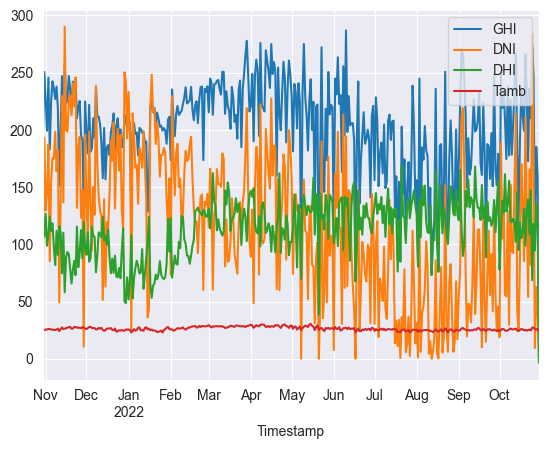

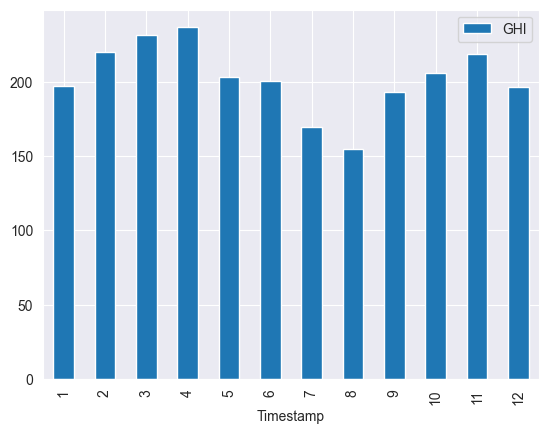

In [17]:
df.set_index("Timestamp", inplace=True)
df[["GHI","DNI","DHI","Tamb"]].resample("D").mean().plot()
df.groupby(df.index.month)[["GHI"]].mean().plot(kind="bar") # Monthly Patterns

## Cleaning Impact

<Axes: xlabel='Cleaning'>

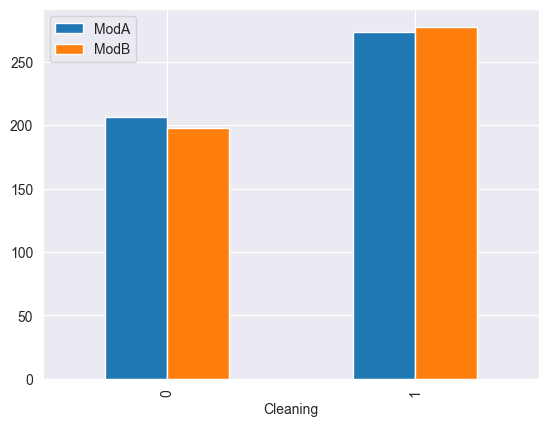

In [18]:
grp = df.groupby("Cleaning")[["ModA","ModB"]].mean()
grp.plot(kind="bar")

## Correlation and Relationship Analysis

<Axes: xlabel='WS', ylabel='GHI'>

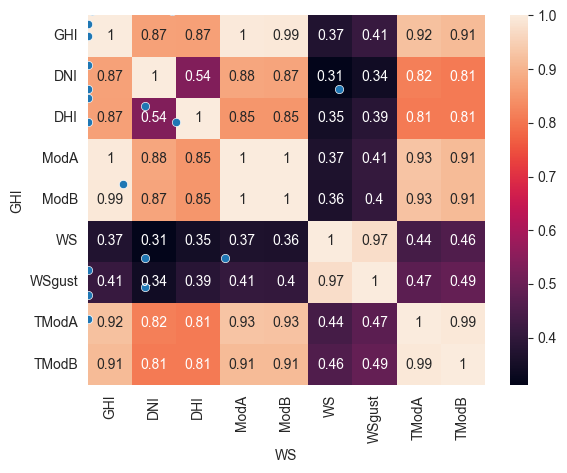

In [19]:
import seaborn as sns
sns.heatmap(df[cols + ["TModA","TModB"]].corr(), annot=True)
sns.scatterplot(x="WS", y="GHI", data=df.sample(1000))
#sns.scatterplot(x="RH", y="GHI", data=df.sample(1000))

## Wind and Distribution Analysis

<Axes: >

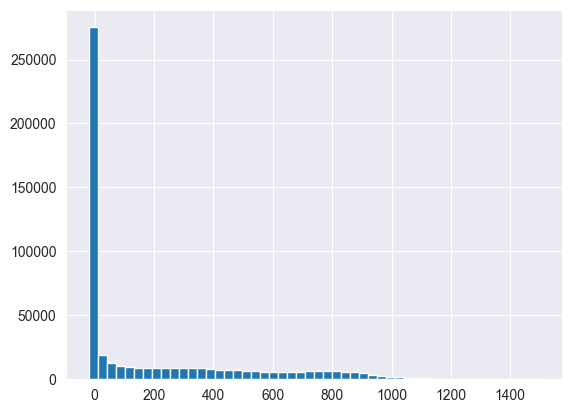

In [20]:
df["GHI"].hist(bins=50)

## Temperatre Analysis

<Axes: xlabel='RH', ylabel='Tamb'>

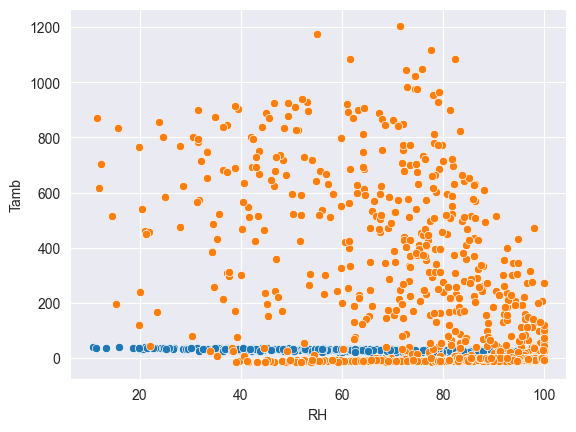

In [21]:
sns.scatterplot(x="RH", y="Tamb", data=df.sample(1000))
sns.scatterplot(x="RH", y="GHI", data=df.sample(1000))

## Bubble Chart

Text(0, 0.5, 'GHI (W/m²)')

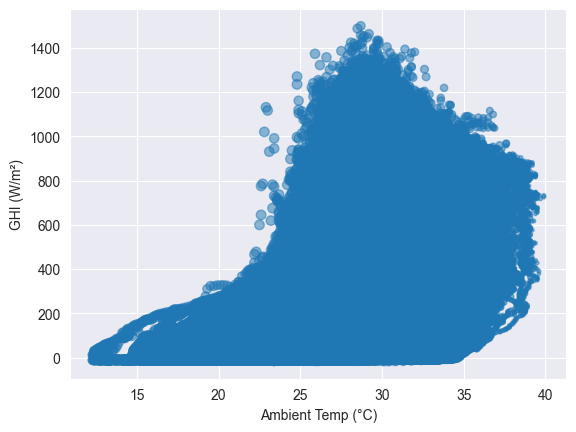

In [22]:
from matplotlib import pyplot as plt

plt.scatter(df["Tamb"], df["GHI"], s=df["RH"]*0.5, alpha=0.5)
plt.xlabel("Ambient Temp (°C)")
plt.ylabel("GHI (W/m²)")